In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score
import warnings

%matplotlib inline

In [2]:
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_sub = pd.read_csv('data/gender_submission.csv')

In [9]:
print(df.head())
print(df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [10]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [12]:
print(df.head())
print(df.shape)

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
(891, 8)


In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
df.describe(percentiles=[0.25, 0.5, 0.95]).T

,count,mean,std,min,25%,50%,95%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,56.00000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,3.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,2.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,112.07915,512.3292


In [15]:
def count_features(features):
    for i, col in enumerate(features.columns):
        plt.figure(i)
        sns.countplot(x=features[col], hue=df['Survived'])

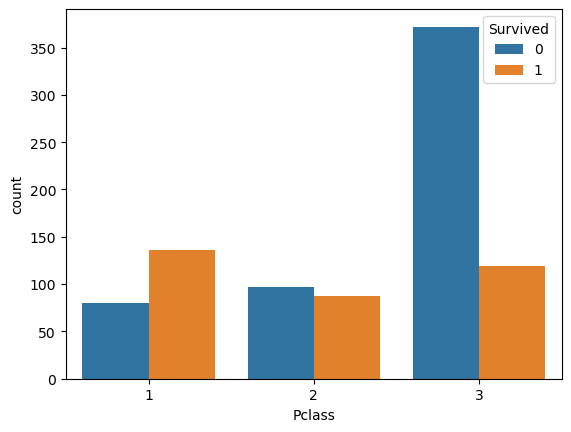

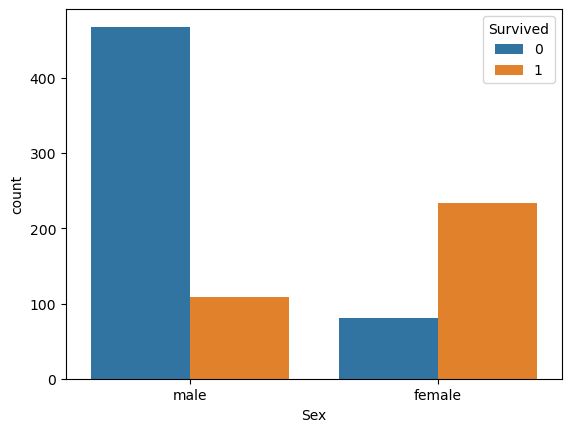

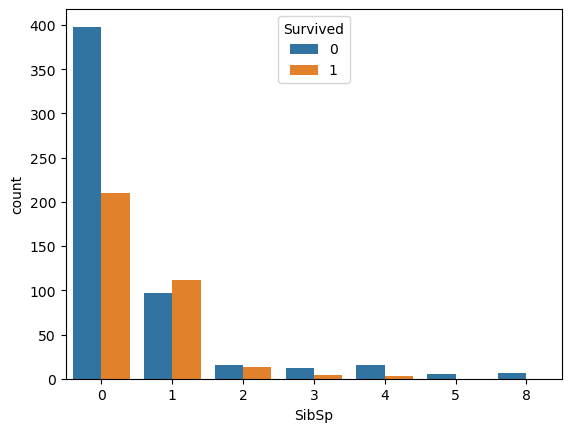

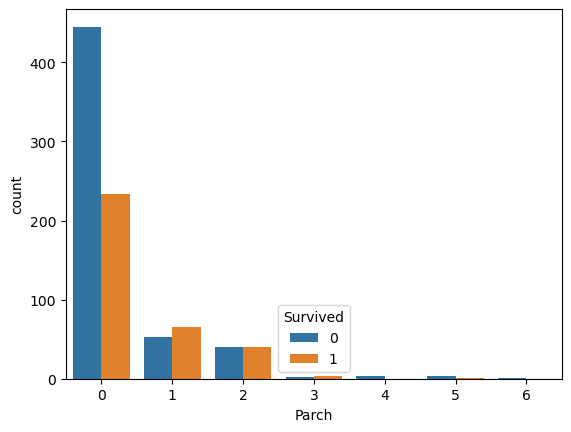

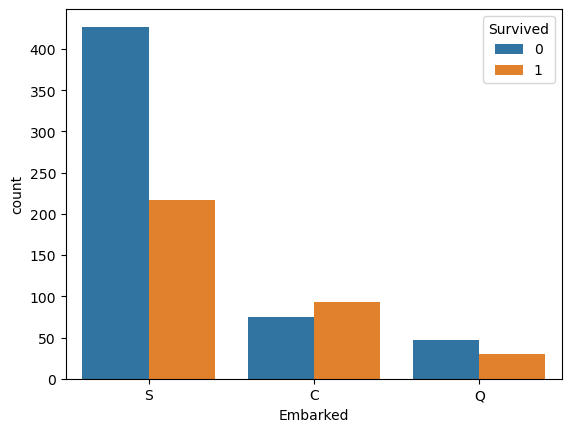

In [16]:
features = df.drop(['Survived', 'Age', 'Fare'], axis=1)
count_features(features)

In [17]:
correlation = df.corr()

In [18]:
correlation

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

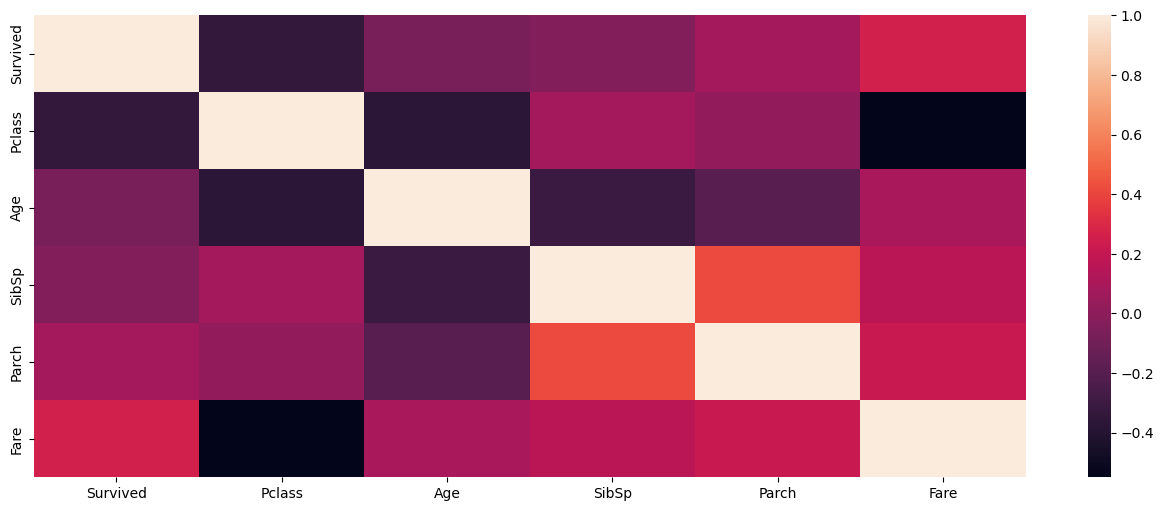

In [19]:
plt.figure(figsize=(16, 6))
sns.heatmap(correlation)

In [21]:
median_age = np.median(df["Age"])
df["Age"].fillna(median_age, inplace=True)
df["Embarked"].fillna("S", inplace=True)
df.isnull().sum().sum()

177